
*   Daniel Gancino
*   Antonio Adrian
*   Dylan Brito

--------------
###1. Read and info of the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Hosteria_Llanovientos.csv')
df

,username,user_country,room_view,stay_duration,stay_type,review_post_date,review_title,rating,original_lang,review_text_liked,review_text_disliked,full_review,en_full_review,found_helpful,found_unhelpful,owner_resp_text
0,Ülle,Estonia,Double or Twin Room,4 nights,Couple,02-28-2025 00:00:00,A highly recommended budget accommodation in B...,10.0,en,The location was excellent. The hosteria is on...,The only downside was the wifi signal that was...,title: A highly recommended budget accommodati...,title: A highly recommended budget accommodati...,0,0,NaN
1,Denis,Spain,Single Room,4 nights,Solo traveller,06-29-2025 00:00:00,Very good,8.0,en,The place has a nice open external area to chi...,The kitchen salon is a bit dark. There's also ...,title: Very good. liked: The place has a nice ...,title: Very good. liked: The place has a nice ...,0,0,NaN
2,Pavol,Slovakia,Single Room,2 nights,Solo traveller,06-19-2025 00:00:00,Superb,9.0,en,The Hosteria is not directly in city center an...,"The hosteria is located at the slope, you have...",title: Superb. liked: The Hosteria is not dire...,title: Superb. liked: The Hosteria is not dire...,0,0,NaN
3,Loriunterwegs,Germany,Single Room,2 nights,Solo traveller,06-11-2025 00:00:00,Very good,8.0,en,Nice and quiet place not far from the city cen...,-,title: Very good. liked: Nice and quiet place ...,title: Very good. liked: Nice and quiet place ...,0,0,NaN
4,Donald,United States,Single Room,7 nights,Solo traveller,06-08-2025 00:00:00,Superb,9.0,en-us,"The view was great. Overlooking the town, moun...",The walk from town was uphill to the hostel.,title: Superb. liked: The view was great. Over...,title: Superb. liked: The view was great. Over...,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Смекалова,Germany,Single Room,1 night,Group,01-31-2023 00:00:00,Good,7.0,ru,NaN,NaN,title: Good.,NaN,0,0,NaN
1024,Stefanie,Germany,Single Room,3 nights,Solo traveller,12-08-2022 00:00:00,Pleasant,6.0,de,NaN,NaN,title: Pleasant.,NaN,0,0,NaN
1025,Anonymous,Czech Republic,NaN,3 nights,Group,10-02-2023 00:00:00,Superb,9.0,cs,NaN,NaN,title: Superb.,NaN,0,0,NaN
1026,Anonymous,Chile,NaN,1 night,Couple,09-30-2023 00:00:00,Very good,8.0,es,NaN,NaN,title: Very good.,NaN,0,0,NaN


-----------
###2. Dataset exploration [Daniel]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   username              1028 non-null   object 
 1   user_country          1021 non-null   object 
 2   room_view             1017 non-null   object 
 3   stay_duration         1028 non-null   object 
 4   stay_type             1028 non-null   object 
 5   review_post_date      1028 non-null   object 
 6   review_title          1026 non-null   object 
 7   rating                1028 non-null   float64
 8   original_lang         1028 non-null   object 
 9   review_text_liked     532 non-null    object 
 10  review_text_disliked  335 non-null    object 
 11  full_review           1028 non-null   object 
 12  en_full_review        246 non-null    object 
 13  found_helpful         1028 non-null   int64  
 14  found_unhelpful       1028 non-null   int64  
 15  owner_resp_text      

In [3]:
df.columns



Index(['username', 'user_country', 'room_view', 'stay_duration', 'stay_type',
       'review_post_date', 'review_title', 'rating', 'original_lang',
       'review_text_liked', 'review_text_disliked', 'full_review',
       'en_full_review', 'found_helpful', 'found_unhelpful',
       'owner_resp_text'],
      dtype='object')

In [4]:
df.describe()

,rating,found_helpful,found_unhelpful
count,1028.000000,1028.000000,1028.0
mean,9.168288,0.039883,0.0
std,1.203648,0.219242,0.0
min,1.000000,0.000000,0.0
25%,9.000000,0.000000,0.0
50%,10.000000,0.000000,0.0
75%,10.000000,0.000000,0.0
max,10.000000,2.000000,0.0


---------
###3. Delete columns that are not relevant or useful for the analysis [Daniel]

In [5]:
df.drop(['username', 'room_view', 'review_title', 'original_lang', 'owner_resp_text'], axis=1, inplace=True)
df


,user_country,stay_duration,stay_type,review_post_date,rating,review_text_liked,review_text_disliked,full_review,en_full_review,found_helpful,found_unhelpful
0,Estonia,4 nights,Couple,02-28-2025 00:00:00,10.0,The location was excellent. The hosteria is on...,The only downside was the wifi signal that was...,title: A highly recommended budget accommodati...,title: A highly recommended budget accommodati...,0,0
1,Spain,4 nights,Solo traveller,06-29-2025 00:00:00,8.0,The place has a nice open external area to chi...,The kitchen salon is a bit dark. There's also ...,title: Very good. liked: The place has a nice ...,title: Very good. liked: The place has a nice ...,0,0
2,Slovakia,2 nights,Solo traveller,06-19-2025 00:00:00,9.0,The Hosteria is not directly in city center an...,"The hosteria is located at the slope, you have...",title: Superb. liked: The Hosteria is not dire...,title: Superb. liked: The Hosteria is not dire...,0,0
3,Germany,2 nights,Solo traveller,06-11-2025 00:00:00,8.0,Nice and quiet place not far from the city cen...,-,title: Very good. liked: Nice and quiet place ...,title: Very good. liked: Nice and quiet place ...,0,0
4,United States,7 nights,Solo traveller,06-08-2025 00:00:00,9.0,"The view was great. Overlooking the town, moun...",The walk from town was uphill to the hostel.,title: Superb. liked: The view was great. Over...,title: Superb. liked: The view was great. Over...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1023,Germany,1 night,Group,01-31-2023 00:00:00,7.0,NaN,NaN,title: Good.,NaN,0,0
1024,Germany,3 nights,Solo traveller,12-08-2022 00:00:00,6.0,NaN,NaN,title: Pleasant.,NaN,0,0
1025,Czech Republic,3 nights,Group,10-02-2023 00:00:00,9.0,NaN,NaN,title: Superb.,NaN,0,0
1026,Chile,1 night,Couple,09-30-2023 00:00:00,8.0,NaN,NaN,title: Very good.,NaN,0,0


**Justification:**

After exploring the dataset, several columns were found irrelevant for analyzing hotel reviews. **Username** was removed as it only identifies the reviewer, and **room_view** because it does not reflect overall satisfaction. **Review_title** was excluded for being redundant with the full review, while **original_lang** was unnecessary since an English-translated version already exists. Finally, **owner_resp_text** was discarded as it represents the hotel’s reply rather than guest feedback.

This reduction leaves the dataset cleaner and focused on variables that better explain guest satisfaction and review trends.



------------
###4. Look for inconsistencies in the dataset [Antonio]

In [6]:
df.isnull().sum()

,0
user_country,7
stay_duration,0
stay_type,0
review_post_date,0
rating,0
review_text_liked,496
review_text_disliked,693
full_review,0
en_full_review,782
found_helpful,0


In [7]:
df['user_country'].unique()

array(['Estonia', 'Spain', 'Slovakia', 'Germany', 'United States',
       'France', 'Ecuador', 'New Zealand', 'Canada', 'Switzerland',
       'United Kingdom', 'Denmark', 'Portugal', 'Austria', 'Poland',
       'Czech Republic', 'Australia', 'Netherlands', 'Kazakhstan',
       'Sweden', 'El Salvador', 'Panama', 'Greece', 'Hungary', 'Israel',
       'Mexico', 'Oman', 'Ukraine', 'Thailand', 'Chile',
       'Bosnia and Herzegovina', 'Belgium', 'Colombia', 'Lithuania',
       'China', 'Zambia', nan, 'Slovenia', 'Argentina', 'Brazil',
       'Guatemala', 'Italy', 'South Korea', 'Costa Rica', 'Russia',
       'Peru', 'Dominican Republic', 'Tunisia', 'Uruguay', 'Bulgaria',
       'Romania', 'Ireland', 'Saudi Arabia', 'Cayman Islands',
       'Philippines', 'Belarus', 'Finland', 'Japan', 'Croatia',
       'Honduras', 'North Macedonia', 'Singapore', 'Turkey'], dtype=object)

In [8]:
df['stay_duration'].unique()

array(['4 nights', '2 nights', '7 nights', '1 night', '3 nights',
       '5 nights', '6 nights'], dtype=object)

In [9]:
df['stay_type'].unique()

array(['Couple', 'Solo traveller', 'Group', 'Family'], dtype=object)

In [10]:
df['review_post_date'].unique()

array(['02-28-2025 00:00:00', '06-29-2025 00:00:00',
       '06-19-2025 00:00:00', '06-11-2025 00:00:00',
       '06-08-2025 00:00:00', '06-07-2025 00:00:00',
       '06-02-2025 00:00:00', '05-22-2025 00:00:00',
       '05-19-2025 00:00:00', '03-07-2025 00:00:00',
       '03-01-2025 00:00:00', '02-20-2025 00:00:00',
       '02-13-2025 00:00:00', '02-11-2025 00:00:00',
       '02-09-2025 00:00:00', '02-06-2025 00:00:00',
       '02-03-2025 00:00:00', '02-02-2025 00:00:00',
       '01-28-2025 00:00:00', '01-12-2025 00:00:00',
       '01-07-2025 00:00:00', '01-05-2025 00:00:00',
       '12-21-2024 00:00:00', '12-16-2024 00:00:00',
       '12-15-2024 00:00:00', '11-13-2024 00:00:00',
       '11-10-2024 00:00:00', '10-18-2024 00:00:00',
       '10-03-2024 00:00:00', '09-15-2024 00:00:00',
       '09-07-2024 00:00:00', '08-15-2024 00:00:00',
       '07-15-2024 00:00:00', '07-11-2024 00:00:00',
       '06-18-2024 00:00:00', '06-14-2024 00:00:00',
       '06-03-2024 00:00:00', '05-23-2024 00:0

In [11]:
df['rating'].unique()

array([10.,  8.,  9.,  6.,  7.,  4.,  5.,  3.,  1.])

In [12]:
df['full_review'].unique()

array(["title: A highly recommended budget accommodation in Baños. liked: The location was excellent. The hosteria is on a hillside, offering a beautiful mountain view across the town and the valley. At the same time the location is also central, only 10 minutes by foot from the main square and 12 minutes from the bus station (Terminal Terrestre). Our room was clean and comfortable, with two queen beds with four(!) soft pillows. The bathroom had hot water for showering. Normally the room is cleaned every day (they ask if you wish that they do). The breakfast was very good. It consisted of eggs, bread rolls, butter and marmalade with juice and coffee - which is what you normally get for breakfast in Ecuador. But the juice was different every day, the croissants were served warm (not every day, though) and the eggs were prepared in a different way. This is actually a big deal if you've been traveling for a long time. We had established a contact with the hosteria in WhatsApp before arriv

In [13]:
df[['found_helpful', 'found_unhelpful']].describe()

,found_helpful,found_unhelpful
count,1028.000000,1028.0
mean,0.039883,0.0
std,0.219242,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,2.000000,0.0


In [14]:
df['found_helpful'].unique()

array([0, 1, 2])

In [15]:
df['found_unhelpful'].unique()

array([0])

**Findings:**

The dataset was carefully examined for inconsistencies by applying different validation techniques. Missing values were identified in the columns **user_country**, **review_text_liked**, **review_text_disliked**, and **full_review**. For each column, the **.unique()** function was applied to verify the consistency of data entries, ensuring that values aligned with expected ranges and formats. For example, in the **rating** column, values ranged from 1 to 10 with no unexpected entries such as zeros, negatives, values greater than 10, or decimals, confirming data validity. The same logic was extended to other categorical fields such as **stay_duration**, **stay_type**, and **user_country**, which showed no irregularities. Additionally, the binary columns were analyzed in more detail. The **found_helpful** column displayed a mean of 0.04, meaning that fewer than 5% of reviews received at least one helpful vote, indicating extremely low variability and limited analytical value. On the other hand, the **found_unhelpful** column contained only zeros, making it a constant feature with no contribution to the analysis. Overall, no significant anomalies were detected aside from the null values mentioned, while two binary columns were deemed irrelevant due to their lack of variability and informational value. Therefore, these two columns could be safely removed from the dataset without affecting the quality or accuracy of the analysis.

------------
###5. Find the column related to the review date and splitted into two columns [Antonio]

In [16]:
df['review_post_date'] = pd.to_datetime(df['review_post_date'], format="%m-%d-%Y %H:%M:%S")

df['review_year'] = df['review_post_date'].dt.year
df['review_month'] = df['review_post_date'].dt.month

df = df[[
    "user_country", "stay_duration", "stay_type",
    "review_post_date", "review_year", "review_month",
    "rating", "review_text_liked", "review_text_disliked",
    "full_review", "en_full_review"
]]

df

,user_country,stay_duration,stay_type,review_post_date,review_year,review_month,rating,review_text_liked,review_text_disliked,full_review,en_full_review
0,Estonia,4 nights,Couple,2025-02-28,2025,2,10.0,The location was excellent. The hosteria is on...,The only downside was the wifi signal that was...,title: A highly recommended budget accommodati...,title: A highly recommended budget accommodati...
1,Spain,4 nights,Solo traveller,2025-06-29,2025,6,8.0,The place has a nice open external area to chi...,The kitchen salon is a bit dark. There's also ...,title: Very good. liked: The place has a nice ...,title: Very good. liked: The place has a nice ...
2,Slovakia,2 nights,Solo traveller,2025-06-19,2025,6,9.0,The Hosteria is not directly in city center an...,"The hosteria is located at the slope, you have...",title: Superb. liked: The Hosteria is not dire...,title: Superb. liked: The Hosteria is not dire...
3,Germany,2 nights,Solo traveller,2025-06-11,2025,6,8.0,Nice and quiet place not far from the city cen...,-,title: Very good. liked: Nice and quiet place ...,title: Very good. liked: Nice and quiet place ...
4,United States,7 nights,Solo traveller,2025-06-08,2025,6,9.0,"The view was great. Overlooking the town, moun...",The walk from town was uphill to the hostel.,title: Superb. liked: The view was great. Over...,title: Superb. liked: The view was great. Over...
...,...,...,...,...,...,...,...,...,...,...,...
1023,Germany,1 night,Group,2023-01-31,2023,1,7.0,NaN,NaN,title: Good.,NaN
1024,Germany,3 nights,Solo traveller,2022-12-08,2022,12,6.0,NaN,NaN,title: Pleasant.,NaN
1025,Czech Republic,3 nights,Group,2023-10-02,2023,10,9.0,NaN,NaN,title: Superb.,NaN
1026,Chile,1 night,Couple,2023-09-30,2023,9,8.0,NaN,NaN,title: Very good.,NaN


------------
###6. Delete the rows that contain null values [Antonio]

In [17]:
df.isnull().sum()

,0
user_country,7
stay_duration,0
stay_type,0
review_post_date,0
review_year,0
review_month,0
rating,0
review_text_liked,496
review_text_disliked,693
full_review,0


In [18]:
df = df.dropna()
df.isnull().sum()

,0
user_country,0
stay_duration,0
stay_type,0
review_post_date,0
review_year,0
review_month,0
rating,0
review_text_liked,0
review_text_disliked,0
full_review,0


In [19]:
df

,user_country,stay_duration,stay_type,review_post_date,review_year,review_month,rating,review_text_liked,review_text_disliked,full_review,en_full_review
0,Estonia,4 nights,Couple,2025-02-28,2025,2,10.0,The location was excellent. The hosteria is on...,The only downside was the wifi signal that was...,title: A highly recommended budget accommodati...,title: A highly recommended budget accommodati...
1,Spain,4 nights,Solo traveller,2025-06-29,2025,6,8.0,The place has a nice open external area to chi...,The kitchen salon is a bit dark. There's also ...,title: Very good. liked: The place has a nice ...,title: Very good. liked: The place has a nice ...
2,Slovakia,2 nights,Solo traveller,2025-06-19,2025,6,9.0,The Hosteria is not directly in city center an...,"The hosteria is located at the slope, you have...",title: Superb. liked: The Hosteria is not dire...,title: Superb. liked: The Hosteria is not dire...
3,Germany,2 nights,Solo traveller,2025-06-11,2025,6,8.0,Nice and quiet place not far from the city cen...,-,title: Very good. liked: Nice and quiet place ...,title: Very good. liked: Nice and quiet place ...
4,United States,7 nights,Solo traveller,2025-06-08,2025,6,9.0,"The view was great. Overlooking the town, moun...",The walk from town was uphill to the hostel.,title: Superb. liked: The view was great. Over...,title: Superb. liked: The view was great. Over...
...,...,...,...,...,...,...,...,...,...,...,...
141,United States,2 nights,Solo traveller,2023-06-22,2023,6,5.0,Beautiful view of the town through picturesque...,Internet did not work. It was incredibly slow ...,"title: Great price, bad wifi, noisy, and plumb...","title: Great price, bad wifi, noisy, and plumb..."
142,Ecuador,2 nights,Solo traveller,2023-06-15,2023,6,7.0,Nice place with fair prices. The receptionist ...,Even though I expressed my need of privacy and...,title: Good. liked: Nice place with fair price...,title: Good. liked: Nice place with fair price...
143,United States,2 nights,Couple,2022-11-11,2022,11,7.0,This was a great hotel with private comfortabl...,"The biggest downside, which isn't a fault of t...",title: Great safe spot right near town! liked:...,title: Great safe spot right near town! liked:...
145,Mexico,1 night,Group,2023-12-31,2023,12,8.0,"Very picturesque, clean and great breakfast. B...",Nothing major to complain about it.,"title: Great. liked: Very picturesque, clean a...","title: Great. liked: Very picturesque, clean a..."


------------
###7. Show the number of reviews per month [Dylan]

In [20]:
reviews_per_month = df.groupby('review_month').size()
reviews_per_month

,0
review_month,
1,8
2,10
3,7
4,5
5,9
6,15
7,6
8,7
9,2


------------
###8. Show the number of reviews per year [Dylan]

In [21]:
reviews_per_year = df.groupby('review_year').size()
reviews_per_year

,0
review_year,
2022,12
2023,43
2024,22
2025,18


------------
###9. Show the number of reviews by country [Dylan]

In [23]:
reviews_per_country = df.groupby('user_country').size()
reviews_per_country

,0
user_country,
Australia,3
Austria,2
Belgium,1
Bosnia and Herzegovina,1
Canada,9
China,1
Czech Republic,1
Denmark,1
Ecuador,9


------------
###10. Graphs []

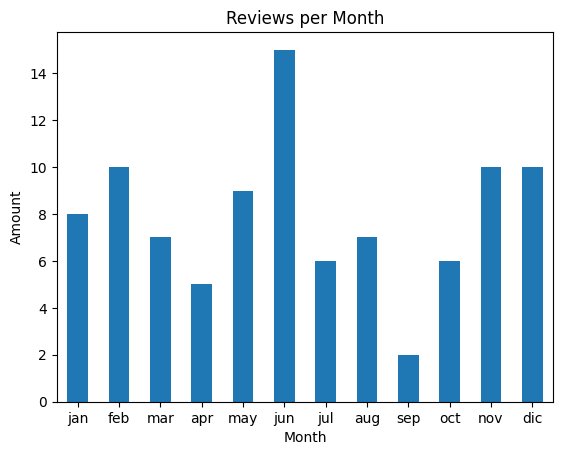

In [22]:
months_labels = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dic']
df['review_month'].value_counts().reindex(range(1,13), fill_value=0).plot(kind='bar', title='Reviews per Month', xlabel='Month', ylabel='Amount')
plt.xticks(ticks=range(12), labels=months_labels, rotation=0)
plt.show()

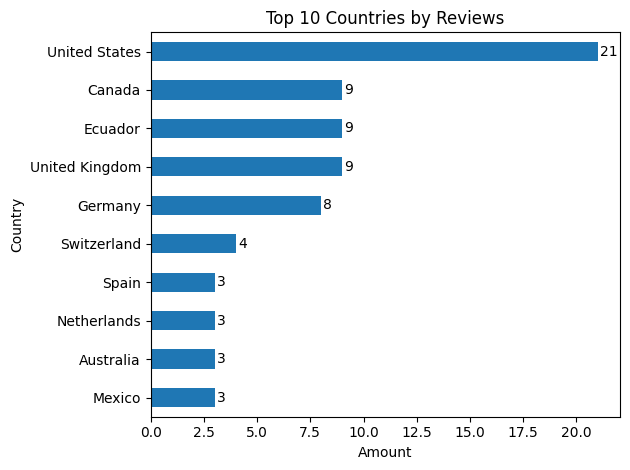

In [24]:
counts_country = df['user_country'].value_counts().head(10)

ax = counts_country.plot(kind='barh', title='Top 10 Countries by Reviews', xlabel='Amount', ylabel='Country')
plt.gca().invert_yaxis()

# Agregar el número al final de cada barra
for i, v in enumerate(counts_country):
    ax.text(v+0.1, i, str(v), va='center')  # +0.5 separa el texto de la barra

plt.tight_layout()
plt.show()

------------
###11. Conclusion []